## Data Visualization

In [ ]:
# uncomment the following line to install leafmap and lonboard
# pip install -U leafmap lonboard 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import leafmap
sns.set_theme(style="dark")

In [2]:
lewo = pd.read_csv('D:/OneDrive/Documents/ArcGIS/Projects/LEWO/LEWO.csv')

In [3]:
lewo.head()

,COMMON_NAME,SCIENTIFIC_NAME,OBSERVATIONs,AGE/SEX,COUNTRY,COUNTRY CODE,STATE,STATE CODE,COUNTY,COUNTY CODE,...,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,ALL SPECIES REPORTED
0,Lewis's Woodpecker,Melanerpes lewis,X,NaN,United States,US,Oregon,US-OR,Jackson,US-OR-029,...,P,42.204375,-122.807327,10/12/1995,08:00:00,obsr280995,S61122166,Traveling,P22,1
1,Lewis's Woodpecker,Melanerpes lewis,2,NaN,United States,US,Washington,US-WA,Klickitat,US-WA-039,...,P,45.893689,-120.503788,28/06/1997,NaN,obsr201374,S60916256,Historical,P62,1
2,Lewis's Woodpecker,Melanerpes lewis,1,NaN,United States,US,California,US-CA,Yolo,US-CA-113,...,P,38.797042,-122.043858,17/04/1999,09:15:00,obsr194146,S7008288,Traveling,P22,1
3,Lewis's Woodpecker,Melanerpes lewis,1,NaN,United States,US,California,US-CA,Tehama,US-CA-103,...,H,39.811503,-122.367568,21/01/1973,15:00:00,obsr718596,S126440835,Traveling,P22,1
4,Lewis's Woodpecker,Melanerpes lewis,2,NaN,United States,US,Colorado,US-CO,Costilla,US-CO-023,...,P,37.003208,-105.536073,22/06/1995,NaN,obsr4381,S66018760,Historical,P62,1


In [ ]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewo, s=5, color=".15")
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewo, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewo, levels=5, color="w", linewidths=1)

In [ ]:
# Load a GeoDataFrame with the United States outline
us = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii') & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewo, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewo, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewo, levels=5, color="w", linewidths=1)

In [2]:
lewoclip = gpd.read_file('D:/OneDrive/Documents/ArcGIS/Projects/LEWO/lewo_clip.csv')

In [ ]:
# this ran forever the first time and never executed
import geopandas as gpd

# Load a GeoDataFrame with the United States outline
us = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii') & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, bins=30, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, levels=5, color="w", linewidths=1)

# Set x and y limits to the range of your data
ax.set_xlim([lewoclip['LONGITUDE'].min(), lewoclip['LONGITUDE'].max()])
ax.set_ylim([lewoclip['LATITUDE'].min(), lewoclip['LATITUDE'].max()])

<Axes: >

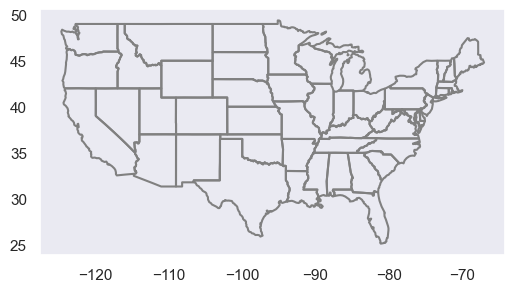

In [2]:
# Load a GeoDataFrame with the United States outline
us = gpd.read_file(
    'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii')
        & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

In [4]:
# Downsample the data
lewoclip_sample = lewoclip.sample(n=10000)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

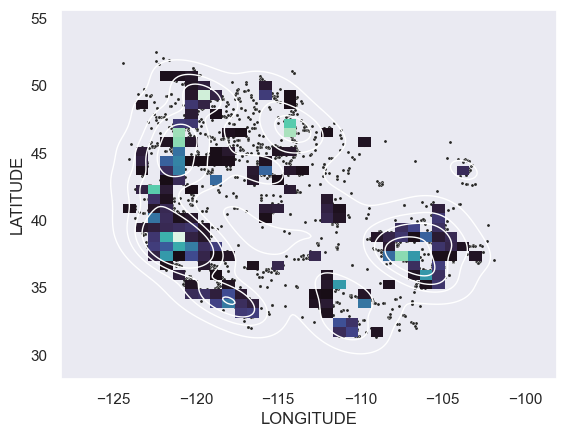

In [6]:
# Convert the 'LATITUDE' and 'LONGITUDE' columns to a numeric type
lewoclip_sample['LATITUDE'] = pd.to_numeric(lewoclip_sample['LATITUDE'], errors='coerce')
lewoclip_sample['LONGITUDE'] = pd.to_numeric(lewoclip_sample['LONGITUDE'], errors='coerce')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1)

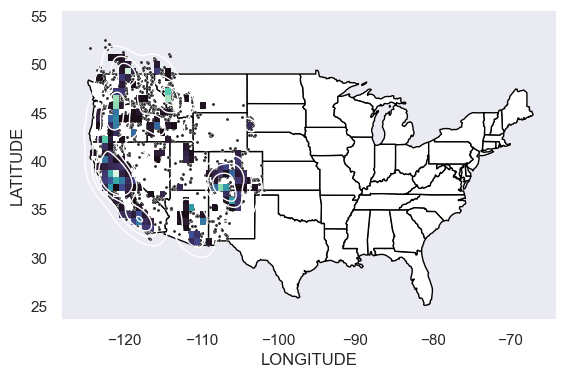

In [7]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the US boundaries
us.plot(ax=ax, color='white', edgecolor='black')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15", ax=ax)

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako", ax=ax)
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1, ax=ax)

plt.show()

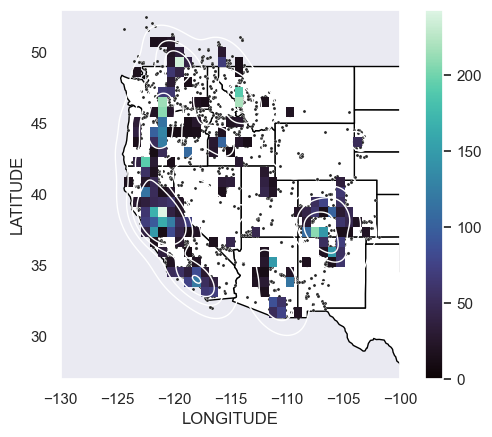

In [18]:
# Clip to western US

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the US boundaries
us.plot(ax=ax, color='white', edgecolor='black')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15", ax=ax)

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako", cbar=True, ax=ax)
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1, ax=ax)

# Set the x-limits to only show the western US and clip the y-limits
ax.set_xlim(left=-130, right=-100)
ax.set_ylim(bottom=27, top=53)

plt.show()

In [4]:
lewoclip.to_csv('lewo_clip.csv', index=False)

In [4]:
# lewoclip = ('lewo_clip.csv')
lewoclip.describe()

In [5]:
lewoclip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140082 entries, 0 to 140081
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OBJECTID       140082 non-null  object  
 1   STATE          140082 non-null  object  
 2   COUNTY         140082 non-null  object  
 3   LATITUDE       140082 non-null  object  
 4   LONGITUDE      140082 non-null  object  
 5   COUNT          140082 non-null  object  
 6   DATE           140082 non-null  object  
 7   LOCALITY       140082 non-null  object  
 8   LOCALITY_ID    140082 non-null  object  
 9   LOCALITY_TYPE  140082 non-null  object  
 10  geometry       0 non-null       geometry
dtypes: geometry(1), object(10)
memory usage: 11.8+ MB


In [8]:
lewoclip.head()

,OBJECTID,STATE,COUNTY,LATITUDE,LONGITUDE,COUNT,DATE,LOCALITY,LOCALITY_ID,LOCALITY_TYPE,geometry
0,1,Oregon,Jackson,42.204375,-122.8073272,X,35043,Yank Gulch Road,L10038184,P,None
1,2,Washington,Klickitat,45.8936893,-120.5037884,2,35609,Bickleton Highway,L10072701,P,None
2,3,California,Yolo,38.7970421,-122.0438576,1,36267,"CR 85, Yolo Co.",L1010494,P,None
3,4,California,Tehama,39.811503,-122.367568,1,26685,Black Butte Lake--Buckhorn Rec Area,L1013396,H,None
4,5,Colorado,Costilla,37.0032075,-105.5360733,2,34872,SLV At 75A5 Garcia,L10194994,P,None
